In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [2]:
missing_values = ['None',' None']
df=pd.read_csv('multichannel_marketing_datasets.csv',na_values=missing_values,encoding='ISO-8859-1')

In [3]:
df.head()

,visitNumber,visitId,visitStartTime,date,visits,hits,pageviews,timeOnSite,bounces,transactions,...,totalTransactionRevenue,sessionQualityDim,referralPath,source,medium,referer,adContent,keyword,fullVisitorId,channelGrouping
0,1.0,1.470059e+09,1.470059e+09,20160801.0,1.0,1.0,1.0,NaN,1.0,NaN,...,NaN,NaN,/yt/about/,youtube.com,referral,https://www.youtube.com/yt/about/,NaN,NaN,3.930000e+18,Social
1,1.0,1.470073e+09,1.470073e+09,20160801.0,1.0,1.0,1.0,NaN,1.0,NaN,...,NaN,NaN,/yt/about/,youtube.com,referral,https://www.youtube.com/yt/about/,NaN,NaN,5.660000e+18,Social
2,1.0,1.470106e+09,1.470106e+09,20160801.0,1.0,1.0,1.0,NaN,1.0,NaN,...,NaN,NaN,/yt/about/,youtube.com,referral,https://www.youtube.com/yt/about/,NaN,NaN,1.600000e+18,Social
3,1.0,1.470059e+09,1.470059e+09,20160801.0,1.0,1.0,1.0,NaN,1.0,NaN,...,NaN,NaN,/yt/about/,youtube.com,referral,https://www.youtube.com/yt/about/,NaN,NaN,7.530000e+18,Social
4,1.0,1.470076e+09,1.470076e+09,20160801.0,1.0,1.0,1.0,NaN,1.0,NaN,...,NaN,NaN,/yt/about/,youtube.com,referral,https://www.youtube.com/yt/about/,NaN,NaN,7.010000e+18,Social


In [4]:
df.columns

Index(['visitNumber', 'visitId', 'visitStartTime', 'date', 'visits', 'hits',
       'pageviews', 'timeOnSite', 'bounces', 'transactions',
       'transactionRevenue', 'newVisits', 'screenviews', 'uniqueScreenviews',
       'timeOnScreen', 'totalTransactionRevenue', 'sessionQualityDim',
       'referralPath', 'source', 'medium', 'referer', 'adContent', 'keyword',
       'fullVisitorId', 'channelGrouping'],
      dtype='object')

In [5]:
df.shape

(9904, 25)

## Missing Value Analysis

In [9]:
# Percentage of missing values.
percent_missing=df.isnull().sum() * 100 / len(df.index)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

missing_value_df

,column_name,percent_missing
visitNumber,visitNumber,0.020194
visitId,visitId,0.020194
visitStartTime,visitStartTime,0.020194
date,date,0.020194
visits,visits,0.020194
hits,hits,0.020194
pageviews,pageviews,0.040388
timeOnSite,timeOnSite,46.960824
bounces,bounces,53.220921
transactions,transactions,99.313409


<AxesSubplot:xlabel='column_name'>

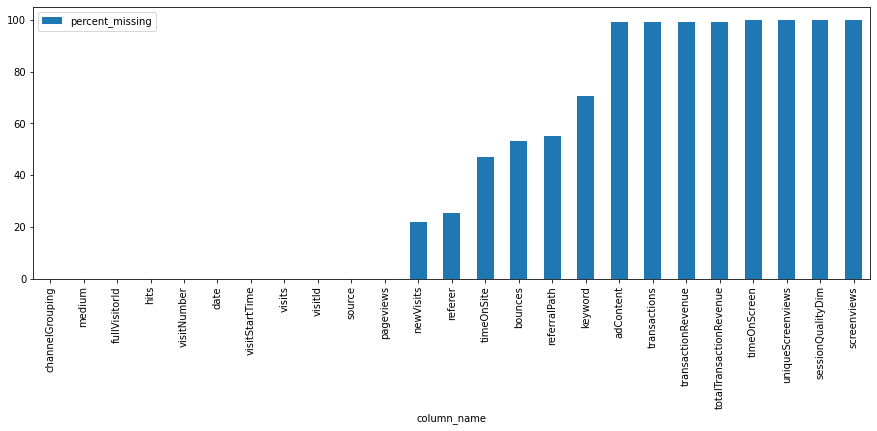

In [10]:
missing_value_df.sort_values("percent_missing").plot(kind='bar',x='column_name',y='percent_missing',figsize=(15, 5))

##### We have seen there are 4 columns which are completely null values,so we remove them  columns are: screenviews","uniqueScreenviews","timeOnScreen","sessionQualityDim" 

In [117]:
df.drop(["screenviews","uniqueScreenviews","timeOnScreen","sessionQualityDim"],inplace=True,axis=1)
df.head()

,visitNumber,visitId,visitStartTime,date,visits,hits,pageviews,timeOnSite,bounces,transactions,...,newVisits,totalTransactionRevenue,referralPath,source,medium,referer,adContent,keyword,fullVisitorId,channelGrouping
0,1.0,1.470059e+09,1.470059e+09,20160801.0,1.0,1.0,1.0,NaN,1.0,NaN,...,1.0,NaN,/yt/about/,youtube.com,referral,https://www.youtube.com/yt/about/,NaN,NaN,3.930000e+18,Social
1,1.0,1.470073e+09,1.470073e+09,20160801.0,1.0,1.0,1.0,NaN,1.0,NaN,...,1.0,NaN,/yt/about/,youtube.com,referral,https://www.youtube.com/yt/about/,NaN,NaN,5.660000e+18,Social
2,1.0,1.470106e+09,1.470106e+09,20160801.0,1.0,1.0,1.0,NaN,1.0,NaN,...,1.0,NaN,/yt/about/,youtube.com,referral,https://www.youtube.com/yt/about/,NaN,NaN,1.600000e+18,Social
3,1.0,1.470059e+09,1.470059e+09,20160801.0,1.0,1.0,1.0,NaN,1.0,NaN,...,1.0,NaN,/yt/about/,youtube.com,referral,https://www.youtube.com/yt/about/,NaN,NaN,7.530000e+18,Social
4,1.0,1.470076e+09,1.470076e+09,20160801.0,1.0,1.0,1.0,NaN,1.0,NaN,...,1.0,NaN,/yt/about/,youtube.com,referral,https://www.youtube.com/yt/about/,NaN,NaN,7.010000e+18,Social


In [118]:
round(df.isnull().sum() * 100 / len(df.index), 2)

visitNumber                 0.02
visitId                     0.02
visitStartTime              0.02
date                        0.02
visits                      0.02
hits                        0.02
pageviews                   0.04
timeOnSite                 46.96
bounces                    53.22
transactions               99.31
transactionRevenue         99.31
newVisits                  21.81
totalTransactionRevenue    99.31
referralPath               55.06
source                      0.03
medium                      0.02
referer                    25.41
adContent                  99.26
keyword                    70.42
fullVisitorId               0.02
channelGrouping             0.00
dtype: float64

#### Although we have some columns like transaction, trasaction revenue, total transaction revenue and ad content they have approx 99% missing values but we not remove them (they will consider as target variable)

In [119]:
df

,visitNumber,visitId,visitStartTime,date,visits,hits,pageviews,timeOnSite,bounces,transactions,...,newVisits,totalTransactionRevenue,referralPath,source,medium,referer,adContent,keyword,fullVisitorId,channelGrouping
0,1.0,1.470059e+09,1.470059e+09,20160801.0,1.0,1.0,1.0,NaN,1.0,NaN,...,1.0,NaN,/yt/about/,youtube.com,referral,https://www.youtube.com/yt/about/,NaN,NaN,3.930000e+18,Social
1,1.0,1.470073e+09,1.470073e+09,20160801.0,1.0,1.0,1.0,NaN,1.0,NaN,...,1.0,NaN,/yt/about/,youtube.com,referral,https://www.youtube.com/yt/about/,NaN,NaN,5.660000e+18,Social
2,1.0,1.470106e+09,1.470106e+09,20160801.0,1.0,1.0,1.0,NaN,1.0,NaN,...,1.0,NaN,/yt/about/,youtube.com,referral,https://www.youtube.com/yt/about/,NaN,NaN,1.600000e+18,Social
3,1.0,1.470059e+09,1.470059e+09,20160801.0,1.0,1.0,1.0,NaN,1.0,NaN,...,1.0,NaN,/yt/about/,youtube.com,referral,https://www.youtube.com/yt/about/,NaN,NaN,7.530000e+18,Social
4,1.0,1.470076e+09,1.470076e+09,20160801.0,1.0,1.0,1.0,NaN,1.0,NaN,...,1.0,NaN,/yt/about/,youtube.com,referral,https://www.youtube.com/yt/about/,NaN,NaN,7.010000e+18,Social
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9899,1.0,1.470349e+09,1.470349e+09,20160804.0,1.0,39.0,27.0,494.0,NaN,1.0,...,1.0,29470000.0,NaN,(direct),(none),NaN,NaN,NaN,4.680000e+18,Direct
9900,2.0,1.470343e+09,1.470343e+09,20160804.0,1.0,39.0,31.0,1301.0,NaN,1.0,...,NaN,67380000.0,/,(direct),(none),https://mall.googleplex.com/,NaN,NaN,2.630000e+18,Referral
9901,4.0,1.470345e+09,1.470345e+09,20160804.0,1.0,42.0,30.0,700.0,NaN,1.0,...,NaN,42780000.0,/,(direct),(none),https://mall.googleplex.com/,NaN,NaN,7.400000e+18,Referral
9902,2.0,1.470341e+09,1.470341e+09,20160804.0,1.0,51.0,37.0,2292.0,NaN,1.0,...,NaN,96700000.0,NaN,google,organic,NaN,NaN,'(not provided)',3.650000e+18,Organic Search


In [120]:
df.date.unique()

array([20160801., 20160803., 20160804., 20160802.,       nan])

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9904 entries, 0 to 9903
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   visitNumber              9902 non-null   float64
 1   visitId                  9902 non-null   float64
 2   visitStartTime           9902 non-null   float64
 3   date                     9902 non-null   float64
 4   visits                   9902 non-null   float64
 5   hits                     9902 non-null   float64
 6   pageviews                9900 non-null   float64
 7   timeOnSite               5253 non-null   float64
 8   bounces                  4633 non-null   float64
 9   transactions             68 non-null     float64
 10  transactionRevenue       68 non-null     float64
 11  newVisits                7744 non-null   float64
 12  totalTransactionRevenue  68 non-null     float64
 13  referralPath             4451 non-null   object 
 14  source                  

# Exploratory Data Analysis

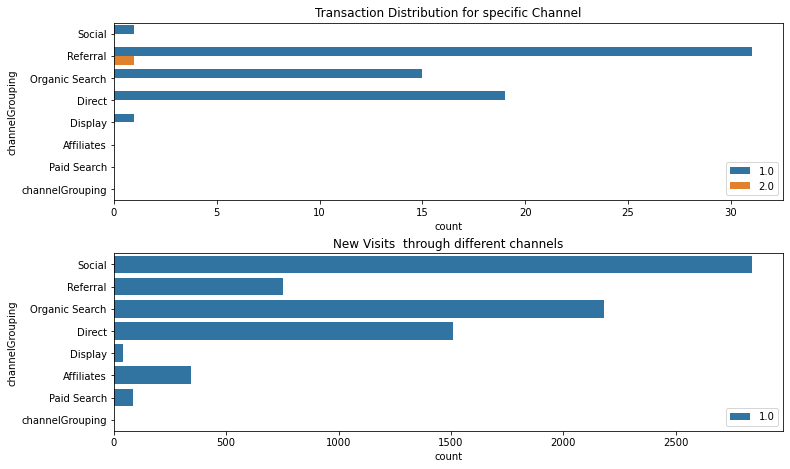

In [122]:
plt.figure(figsize=(12,16))
plt.subplots_adjust(wspace=1,hspace=0.3)
plt.subplot(411)
plt.title("Transaction Distribution for specific Channel")
sns.countplot(y='channelGrouping', hue='transactions', data = df)
plt.legend(loc=4)
plt.subplot(412)
plt.title("New Visits  through different channels")
sns.countplot(y='channelGrouping', hue='newVisits', data = df)
plt.legend(loc=4)

# plt.subplot(413)
# plt.title("PageViews through diff channels")
# sns.countplot(y='channelGrouping', hue='pageviews', data = df)
# plt.legend(loc=4)



Observations: 
1) Highest number of transactions through referral channel <br>
2) Highest visits are coming from Social channel or organic search <br>
we interpret from this we don't get highest revenue from investing in social channel

In [124]:
df.groupby['channelGrouping'].sum()

TypeError: 'method' object is not subscriptable

In [12]:
df.transactions.unique()

array([nan,  1.,  2.])

In [13]:
df.pageviews.unique()

array([  1.,   2.,   3.,  24.,  38.,   4.,   9.,  11.,   7.,   8.,   6.,
         5.,  10.,  13.,  15.,  12.,  17.,  16.,  19.,  20.,  59.,  23.,
        45.,  35.,  46.,  28.,  39.,  22.,  31.,  14.,  18.,  21.,  27.,
        25.,  32.,  30.,  40.,  60.,  33.,  64.,  70.,  43.,  26.,  36.,
        29.,  44.,  54.,  42.,  49.,  82., 102., 130.,  47.,  68., 169.,
        34.,  50., 133.,  37.,  41.,  48., 132.,  53.,  56.,  61.,  58.,
        67.,  74., 116.,  55.,  nan,  52., 109.,  80., 166.,  91.,  51.,
       100., 108., 131.,  92.,  57., 121.,  71.,  96.,  99.,  65., 101.,
       148.,  62.,  72., 103.])

[]

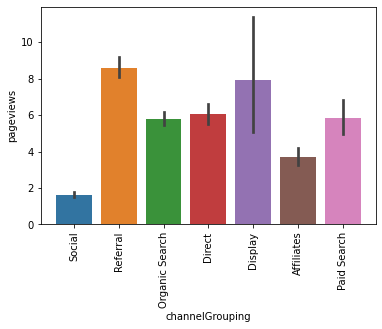

In [14]:
sns.barplot(y='pageviews',x='channelGrouping',data=df)
plt.xticks(rotation=90)
plt.plot()

In [15]:
df.source.value_counts()

(direct)                       3106
google                         2915
youtube.com                    2800
Partners                        390
facebook.com                     95
analytics.google.com             83
seroundtable.com                 71
dfa                              69
google.com                       49
sites.google.com                 41
m.facebook.com                   38
siliconvalley.about.com          29
baidu                            28
plus.google.com                  19
plus.url.google.com              18
lunametrics.com                  16
qiita.com                        14
squishable.com                   13
l.facebook.com                   11
reddit.com                        9
t.co                              8
mail.google.com                   8
quora.com                         8
yahoo                             6
google.co.jp                      5
google.co.uk                      4
phandroid.com                     4
bing                        

[]

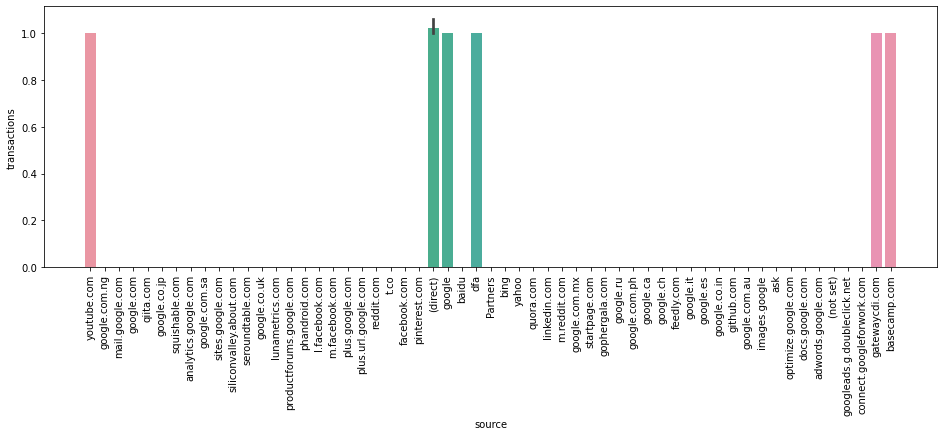

In [16]:
plt.figure(figsize=(16,12))
plt.subplots_adjust(wspace=1,hspace=0.5)
plt.subplot(2,1,1)
sns.barplot(x='source', y='transactions',data=df)
plt.xticks(rotation=90)
plt.plot()

###### There are some sources whose occurence is only once also there is no transaction with that sources, so we will remove them

In [17]:
src=[]
for idx,name in enumerate(df['source'].value_counts().index.tolist()):
    if(df['source'].value_counts()[idx]<=1):
        src.append(name)     
src   

['google.it',
 'startpage.com',
 'github.com',
 'images.google',
 'ask',
 'google.es',
 'google.ca',
 'feedly.com',
 'google.com.mx',
 'm.reddit.com',
 'google.ru',
 'google.com.ng',
 'google.com.sa',
 'adwords.google.com',
 'google.com.ph',
 'gophergala.com',
 'connect.googleforwork.com',
 'gatewaycdi.com',
 'google.com.au',
 'basecamp.com',
 'google.ch']

In [18]:
df = df[~df['source'].isin(src)]

In [19]:
# remove 'not set' source value record
index_name=df[df['source']=='(not set)'].index
index_name
df.drop(index_name,inplace=True)

c:\python37\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
df.source.value_counts()

(direct)                       3106
google                         2915
youtube.com                    2800
Partners                        390
facebook.com                     95
analytics.google.com             83
seroundtable.com                 71
dfa                              69
google.com                       49
sites.google.com                 41
m.facebook.com                   38
siliconvalley.about.com          29
baidu                            28
plus.google.com                  19
plus.url.google.com              18
lunametrics.com                  16
qiita.com                        14
squishable.com                   13
l.facebook.com                   11
reddit.com                        9
t.co                              8
quora.com                         8
mail.google.com                   8
yahoo                             6
google.co.jp                      5
google.co.uk                      4
phandroid.com                     4
googleads.g.doubleclick.net 

In [21]:
# percentage of missing values in "time On site" column
round(df['timeOnSite'].isnull().sum() * 100 / len(df.index), 2)

47.03

<AxesSubplot:xlabel='timeOnSite', ylabel='totalTransactionRevenue'>

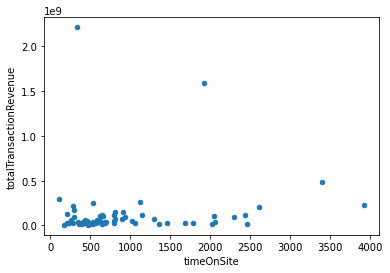

In [22]:
ax = plt.gca()
df.plot(kind='scatter',x='timeOnSite',y='totalTransactionRevenue',ax=ax)

from this plot we observe revenue is independent of time on site
or we can say that inspite of spend more time on site user may or may not make transaction

#### EDA with channel Grouping 

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Affiliates'),
  Text(1, 0, 'Direct'),
  Text(2, 0, 'Display'),
  Text(3, 0, 'Organic Search'),
  Text(4, 0, 'Paid Search'),
  Text(5, 0, 'Referral'),
  Text(6, 0, 'Social'),
  Text(7, 0, 'channelGrouping')])

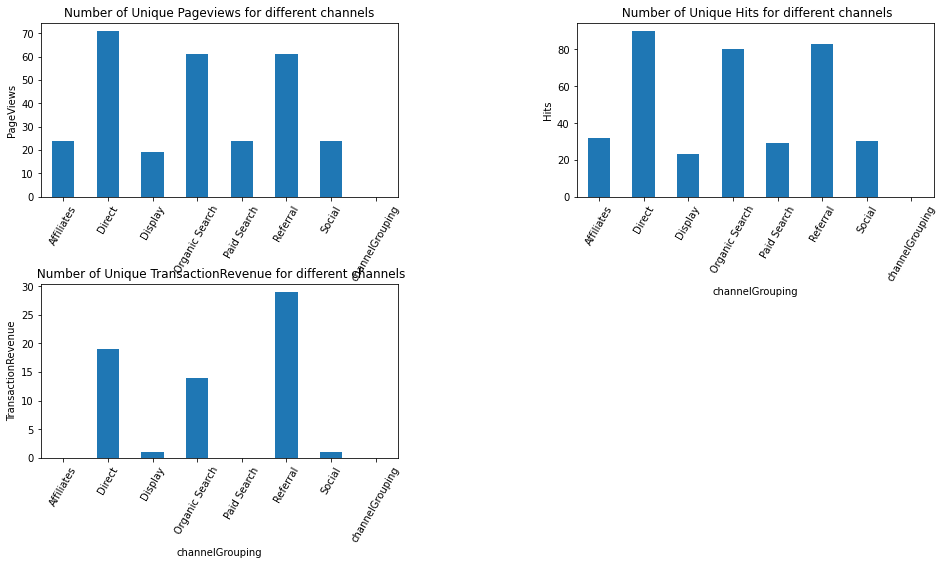

In [23]:
plt.figure(figsize=(16,8))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.subplot(2,2,1)
plt.title('Number of Unique Pageviews for different channels')
df.groupby('channelGrouping')['pageviews'].nunique().plot(kind='bar')
plt.ylabel('PageViews')
plt.xticks(rotation=60)

plt.subplot(2,2,2)
plt.title(' Number of Unique Hits for different channels')
df.groupby('channelGrouping')['hits'].nunique().plot(kind='bar')
plt.ylabel('Hits')
plt.xticks(rotation=60)

plt.subplot(2,2,3)
plt.title(' Number of Unique TransactionRevenue for different channels')
df.groupby('channelGrouping')['totalTransactionRevenue'].nunique().plot(kind='bar')
plt.ylabel('TransactionRevenue')
plt.xticks(rotation=60)

In [24]:
#remove 'channelgrouping'  as it consist all null values
df = df[~df['channelGrouping'].isin(['channelGrouping'])]
df['channelGrouping'].unique()

array(['Social', 'Referral', 'Organic Search', 'Direct', 'Display',
       'Affiliates', 'Paid Search'], dtype=object)

In [25]:
df['channelGrouping'].value_counts()

Social            3010
Organic Search    2771
Direct            2038
Referral          1419
Affiliates         390
Paid Search        181
Display             69
Name: channelGrouping, dtype: int64

In [26]:
df.groupby('channelGrouping')['totalTransactionRevenue'].unique()

channelGrouping
Affiliates                                                    [nan]
Direct            [nan, 29480000.0, 66900000.0, 102200000.0, 149...
Display                                           [nan, 55740000.0]
Organic Search    [nan, 12990000.0, 19990000.0, 217920000.0, 125...
Paid Search                                                   [nan]
Referral          [nan, 22590000.0, 132800000.0, 65580000.0, 321...
Social                                            [nan, 23990000.0]
Name: totalTransactionRevenue, dtype: object

In [27]:
df.groupby('channelGrouping')['totalTransactionRevenue'].nunique()

channelGrouping
Affiliates         0
Direct            19
Display            1
Organic Search    14
Paid Search        0
Referral          29
Social             1
Name: totalTransactionRevenue, dtype: int64

[]

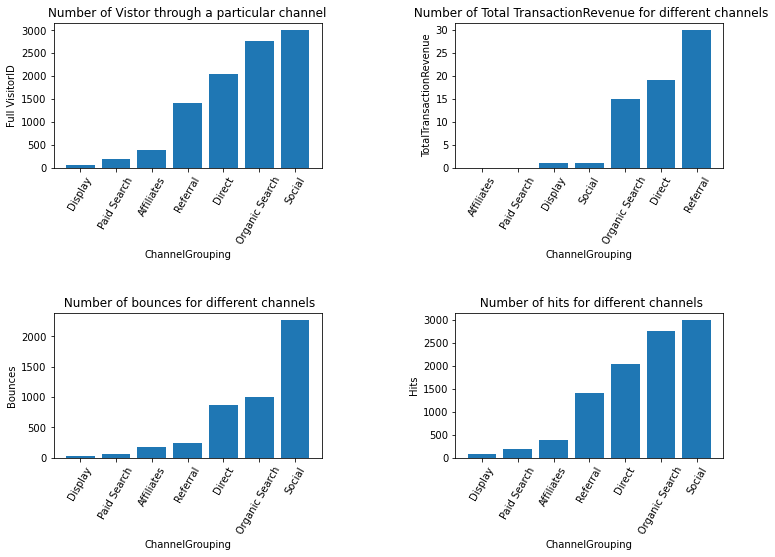

In [28]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(wspace=0.5,hspace=1)
plt.subplot(2,2,1)
cfv=df.groupby('channelGrouping')['fullVisitorId'].agg('count').to_frame()
cfv.columns=['count_fullVisitorId']
plt.title('Number of Vistor through a particular channel')
cfv_sorted=cfv.sort_values(by='count_fullVisitorId',ascending=True)
plt.bar(cfv_sorted.index,'count_fullVisitorId',data=cfv_sorted)
plt.ylabel('Full VisitorID')
plt.xlabel('ChannelGrouping')
plt.xticks(rotation=60)
plt.plot()



plt.subplot(2,2,2)
plt.title(' Number of Total TransactionRevenue for different channels')
ctr=df.groupby('channelGrouping')['totalTransactionRevenue'].agg('count').to_frame()
ctr.columns=['count_totalTransactionRevenue']
ctr_sorted=ctr.sort_values(by='count_totalTransactionRevenue',ascending=True)
plt.bar(ctr_sorted.index,'count_totalTransactionRevenue',data=ctr_sorted)
plt.ylabel('TotalTransactionRevenue')
plt.xlabel('ChannelGrouping')
plt.xticks(rotation=60)
plt.plot()


plt.subplot(2,2,3)
plt.title(' Number of bounces for different channels')
cb=df.groupby('channelGrouping')['bounces'].agg('count').to_frame()
cb.columns=['count_bounces']
cb_sorted=cb.sort_values(by='count_bounces',ascending=True)
plt.bar(cb_sorted.index,'count_bounces',data=cb_sorted)
plt.ylabel('Bounces')
plt.xlabel('ChannelGrouping')
plt.xticks(rotation=60)
plt.plot()


plt.subplot(2,2,4)
plt.title(' Number of hits for different channels')
ch=df.groupby('channelGrouping')['hits'].agg('count').to_frame()
ch.columns=['count_hits']
ch_sorted=ch.sort_values(by='count_hits',ascending=True)
plt.bar(ch_sorted.index,'count_hits',data=ch_sorted)
plt.ylabel('Hits')
plt.xlabel('ChannelGrouping')
plt.xticks(rotation=60)
plt.plot()

### Observations
The most revenue is coming from ‘organic search’, ‘Direct’,’Referral’.., but no.of visits in ‘Direct’, ‘referral’ are very less.<br>
so here conclusion is the analytics team can invest less money in ‘Direct’,’referral’ channels (since less users are visiting from this channel) and can generate most revenue.

In [29]:
ch=df.groupby('channelGrouping')['hits'].agg('count').to_frame()
print(ch)
cfv=df.groupby('channelGrouping')['fullVisitorId'].agg('count').to_frame()
print(cfv)
cp=df.groupby('channelGrouping')['pageviews'].agg('count').to_frame()
print(cp)
cb=df.groupby('channelGrouping')['bounces'].agg('count').to_frame()
print(cb)

                 hits
channelGrouping      
Affiliates        390
Direct           2038
Display            69
Organic Search   2771
Paid Search       181
Referral         1419
Social           3010
                 fullVisitorId
channelGrouping               
Affiliates                 390
Direct                    2038
Display                     69
Organic Search            2771
Paid Search                181
Referral                  1419
Social                    3010
                 pageviews
channelGrouping           
Affiliates             390
Direct                2038
Display                 69
Organic Search        2769
Paid Search            181
Referral              1419
Social                3010
                 bounces
channelGrouping         
Affiliates           178
Direct               870
Display               23
Organic Search       996
Paid Search           54
Referral             234
Social              2274


count of visits= counts of pageviews= count of full visitor id in respect of channelGroupng

#### EDA with Medium

In [30]:
df.medium.value_counts()

referral     3360
(none)       3106
organic      2771
affiliate     390
cpc           181
cpm            69
(not set)       1
Name: medium, dtype: int64

In [31]:
# reomove (not set) record in medium column
index_name=df[df['medium']=='(not set)'].index
index_name
df.drop(index_name,inplace=True)

c:\python37\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [32]:
medium_df=df.groupby('medium')

In [33]:
medium_df.sum()

,visitNumber,visitId,visitStartTime,date,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits,totalTransactionRevenue,fullVisitorId
medium,,,,,,,,,,,,,,
(none),11389.0,4.566466e+12,4.566466e+12,6.261945e+10,3106.0,30693.0,22927.0,699451.0,958.0,50.0,7.687330e+09,1971.0,7.977090e+09,1.377727e+22
affiliate,484.0,5.734188e+11,5.734188e+11,7.862713e+09,390.0,1828.0,1438.0,51550.0,178.0,0.0,0.000000e+00,342.0,0.000000e+00,1.878565e+21
cpc,1509.0,2.661119e+11,2.661119e+11,3.649105e+09,181.0,1350.0,1056.0,32874.0,54.0,0.0,0.000000e+00,85.0,0.000000e+00,7.370494e+20
cpm,232.0,1.014461e+11,1.014461e+11,1.391095e+09,69.0,675.0,548.0,16289.0,23.0,1.0,5.074000e+07,39.0,5.574000e+07,2.686275e+20
organic,8113.0,4.074027e+12,4.074027e+12,5.586558e+10,2771.0,20620.0,16009.0,477517.0,996.0,15.0,7.275800e+08,2179.0,7.915800e+08,1.249259e+22
referral,5154.0,4.940005e+12,4.940005e+12,6.774030e+10,3360.0,7656.0,6533.0,145418.0,2420.0,1.0,1.699000e+07,3111.0,2.399000e+07,1.494864e+22


<b> We group the datasets according to 'medium column' and sum all  the values of other columns </b>

In [34]:
medium_df.count()

,visitNumber,visitId,visitStartTime,date,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits,totalTransactionRevenue,referralPath,source,referer,adContent,keyword,fullVisitorId,channelGrouping
medium,,,,,,,,,,,,,,,,,,,,
(none),3106,3106,3106,3106,3106,3106,3106,2141,958,49,49,1971,49,1068,3106,1153,0,0,3106,3106
affiliate,390,390,390,390,390,390,390,212,178,0,0,342,0,0,390,323,0,0,390,390
cpc,181,181,181,181,181,181,181,124,54,0,0,85,0,0,181,89,72,181,181,181
cpm,69,69,69,69,69,69,69,45,23,1,1,39,1,0,69,40,0,0,69,69
organic,2771,2771,2771,2771,2771,2771,2769,1771,996,15,15,2179,15,0,2771,2468,0,2743,2771,2771
referral,3360,3360,3360,3360,3360,3360,3360,939,2420,1,1,3111,1,3360,3360,3294,0,0,3360,3360


<b>Group the datasets and count number of records according to 'medium'</b>

In [36]:
medium_df['transactions'].describe()

,count,mean,std,min,25%,50%,75%,max
medium,,,,,,,,
(none),49.0,1.020408,0.142857,1.0,1.0,1.0,1.0,2.0
affiliate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpc,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpm,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
organic,15.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
referral,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0


In [37]:
medium_df['totalTransactionRevenue'].nunique()

medium
(none)       48
affiliate     0
cpc           0
cpm           1
organic      14
referral      1
Name: totalTransactionRevenue, dtype: int64

# Data Preparation

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9877 entries, 0 to 9903
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   visitNumber              9877 non-null   float64
 1   visitId                  9877 non-null   float64
 2   visitStartTime           9877 non-null   float64
 3   date                     9877 non-null   float64
 4   visits                   9877 non-null   float64
 5   hits                     9877 non-null   float64
 6   pageviews                9875 non-null   float64
 7   timeOnSite               5232 non-null   float64
 8   bounces                  4629 non-null   float64
 9   transactions             66 non-null     float64
 10  transactionRevenue       66 non-null     float64
 11  newVisits                7727 non-null   float64
 12  totalTransactionRevenue  66 non-null     float64
 13  referralPath             4428 non-null   object 
 14  source                  

In [39]:
df.isnull().sum()

visitNumber                   0
visitId                       0
visitStartTime                0
date                          0
visits                        0
hits                          0
pageviews                     2
timeOnSite                 4645
bounces                    5248
transactions               9811
transactionRevenue         9811
newVisits                  2150
totalTransactionRevenue    9811
referralPath               5449
source                        0
medium                        0
referer                    2510
adContent                  9805
keyword                    6953
fullVisitorId                 0
channelGrouping               0
dtype: int64

In [40]:
df.fillna(0,inplace=True)

c:\python37\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [41]:
df.head(10)

,visitNumber,visitId,visitStartTime,date,visits,hits,pageviews,timeOnSite,bounces,transactions,...,newVisits,totalTransactionRevenue,referralPath,source,medium,referer,adContent,keyword,fullVisitorId,channelGrouping
0,1.0,1.470059e+09,1.470059e+09,20160801.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,/yt/about/,youtube.com,referral,https://www.youtube.com/yt/about/,0,0,3.930000e+18,Social
1,1.0,1.470073e+09,1.470073e+09,20160801.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,/yt/about/,youtube.com,referral,https://www.youtube.com/yt/about/,0,0,5.660000e+18,Social
2,1.0,1.470106e+09,1.470106e+09,20160801.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,/yt/about/,youtube.com,referral,https://www.youtube.com/yt/about/,0,0,1.600000e+18,Social
3,1.0,1.470059e+09,1.470059e+09,20160801.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,/yt/about/,youtube.com,referral,https://www.youtube.com/yt/about/,0,0,7.530000e+18,Social
4,1.0,1.470076e+09,1.470076e+09,20160801.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,/yt/about/,youtube.com,referral,https://www.youtube.com/yt/about/,0,0,7.010000e+18,Social
5,1.0,1.470087e+09,1.470087e+09,20160801.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,/yt/about/,youtube.com,referral,https://www.youtube.com/yt/about/,0,0,8.170000e+18,Social
6,1.0,1.470041e+09,1.470041e+09,20160801.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,/yt/about/,youtube.com,referral,https://www.youtube.com/yt/about/,0,0,3.520000e+17,Social
7,1.0,1.470117e+09,1.470117e+09,20160801.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,/yt/about/,youtube.com,referral,https://www.youtube.com/yt/about/,0,0,5.970000e+18,Social
8,1.0,1.470058e+09,1.470058e+09,20160801.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,/yt/about/,youtube.com,referral,https://www.youtube.com/yt/about/,0,0,7.110000e+18,Social
9,1.0,1.470077e+09,1.470077e+09,20160801.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,/yt/about/,youtube.com,referral,https://www.youtube.com/yt/about/,0,0,6.620000e+18,Social


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9877 entries, 0 to 9903
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   visitNumber              9877 non-null   float64
 1   visitId                  9877 non-null   float64
 2   visitStartTime           9877 non-null   float64
 3   date                     9877 non-null   float64
 4   visits                   9877 non-null   float64
 5   hits                     9877 non-null   float64
 6   pageviews                9877 non-null   float64
 7   timeOnSite               9877 non-null   float64
 8   bounces                  9877 non-null   float64
 9   transactions             9877 non-null   float64
 10  transactionRevenue       9877 non-null   float64
 11  newVisits                9877 non-null   float64
 12  totalTransactionRevenue  9877 non-null   float64
 13  referralPath             9877 non-null   object 
 14  source                  

drop referr, newvisits, referral path,date,visitId, visitStartTime

In [43]:
channelg_df=df.groupby("channelGrouping").sum()
channelg_df.reset_index(inplace=True)
channelg_df.drop(columns=['visitNumber', 'visitId',"visitStartTime","date",'fullVisitorId'],inplace=True)

channelg_df

,channelGrouping,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits,totalTransactionRevenue
0,Affiliates,390.0,1828.0,1438.0,51550.0,178.0,0.0,0.000000e+00,342.0,0.000000e+00
1,Direct,2038.0,16529.0,12328.0,393652.0,870.0,19.0,3.810310e+09,1509.0,3.894310e+09
2,Display,69.0,675.0,548.0,16289.0,23.0,1.0,5.074000e+07,39.0,5.574000e+07
3,Organic Search,2771.0,20620.0,16009.0,477517.0,996.0,15.0,7.275800e+08,2179.0,7.915800e+08
4,Paid Search,181.0,1350.0,1056.0,32874.0,54.0,0.0,0.000000e+00,85.0,0.000000e+00
5,Referral,1418.0,16331.0,12240.0,355847.0,234.0,31.0,3.877020e+09,737.0,4.082780e+09
6,Social,3010.0,5489.0,4892.0,95370.0,2274.0,1.0,1.699000e+07,2836.0,2.399000e+07


In [44]:
cat_df=channelg_df.select_dtypes(include='object')
cat_df

,channelGrouping
0,Affiliates
1,Direct
2,Display
3,Organic Search
4,Paid Search
5,Referral
6,Social


In [45]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='first', sparse=False)
cat_df=pd.DataFrame(enc.fit_transform(cat_df),columns=enc.get_feature_names(cat_df.columns))
cat_df.head()

,channelGrouping_Direct,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social
0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0


In [46]:
df_num=channelg_df.select_dtypes('number')
df_num

,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits,totalTransactionRevenue
0,390.0,1828.0,1438.0,51550.0,178.0,0.0,0.000000e+00,342.0,0.000000e+00
1,2038.0,16529.0,12328.0,393652.0,870.0,19.0,3.810310e+09,1509.0,3.894310e+09
2,69.0,675.0,548.0,16289.0,23.0,1.0,5.074000e+07,39.0,5.574000e+07
3,2771.0,20620.0,16009.0,477517.0,996.0,15.0,7.275800e+08,2179.0,7.915800e+08
4,181.0,1350.0,1056.0,32874.0,54.0,0.0,0.000000e+00,85.0,0.000000e+00
5,1418.0,16331.0,12240.0,355847.0,234.0,31.0,3.877020e+09,737.0,4.082780e+09
6,3010.0,5489.0,4892.0,95370.0,2274.0,1.0,1.699000e+07,2836.0,2.399000e+07


In [47]:
#Standardizing numerical data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_num=pd.DataFrame(scaler.fit_transform(df_num),columns=df_num.columns)
df_num.head()

,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits,totalTransactionRevenue
0,-0.892739,-0.904451,-0.920278,-0.831059,-0.643459,-0.840526,-0.720477,-0.750816,-0.724984
1,0.548235,0.956068,0.904480,1.042465,0.277888,0.827981,1.544936,0.399271,1.508548
2,-1.173414,-1.050372,-1.069409,-1.024166,-0.849831,-0.752710,-0.690310,-1.049425,-0.693015
3,1.189153,1.473815,1.521278,1.501752,0.445648,0.476716,-0.287896,1.059561,-0.270983
4,-1.075484,-0.964946,-0.984287,-0.933339,-0.808556,-0.840526,-0.720477,-1.004091,-0.724984


In [61]:
channelg_df=pd.concat([df_num,cat_df],axis=1)
channelg_df

,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits,totalTransactionRevenue,channelGrouping_Direct,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social
0,-0.892739,-0.904451,-0.920278,-0.831059,-0.643459,-0.840526,-0.720477,-0.750816,-0.724984,0.0,0.0,0.0,0.0,0.0,0.0
1,0.548235,0.956068,0.904480,1.042465,0.277888,0.827981,1.544936,0.399271,1.508548,1.0,0.0,0.0,0.0,0.0,0.0
2,-1.173414,-1.050372,-1.069409,-1.024166,-0.849831,-0.752710,-0.690310,-1.049425,-0.693015,0.0,1.0,0.0,0.0,0.0,0.0
3,1.189153,1.473815,1.521278,1.501752,0.445648,0.476716,-0.287896,1.059561,-0.270983,0.0,0.0,1.0,0.0,0.0,0.0
4,-1.075484,-0.964946,-0.984287,-0.933339,-0.808556,-0.840526,-0.720477,-1.004091,-0.724984,0.0,0.0,0.0,1.0,0.0,0.0
5,0.006121,0.931010,0.889734,0.835426,-0.568900,1.881775,1.584599,-0.361540,1.616643,0.0,0.0,0.0,0.0,1.0,0.0
6,1.398129,-0.441125,-0.341517,-0.591079,2.147211,-0.752710,-0.710376,1.707040,-0.711225,0.0,0.0,0.0,0.0,0.0,1.0


In [62]:
channelg_df.shape

(7, 15)

In [63]:
#Extract target and independent vaiables
y=channelg_df.pop('totalTransactionRevenue')
X=channelg_df

In [64]:
x_train=X
y_train=y

In [66]:
#print shape of train and test data
print("X_train_shape=",x_train.shape)
print("y_train_shape=",y_train.shape)

X_train_shape= (7, 14)
y_train_shape= (7,)


# Model Building

### Descision Tree Regession

In [68]:
from sklearn.tree import DecisionTreeRegressor
regressor =  DecisionTreeRegressor()
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

### Import Test dataset and perform evaluation

In [71]:
missing_values = ['None',' None']
df_test=pd.read_csv("testdataset.csv",na_values=missing_values)

In [72]:
df_test.head(10)

,visitNumber,visitId,visitStartTime,date,visits,hits,pageviews,bounces,transactions,transactionRevenue,newVisits,totalTransactionRevenue,referralPath,source,medium,referer,channelGrouping
0,1,1470410536,1470410536,20160805,1,1,1,1.0,NaN,NaN,1.0,NaN,NaN,google,organic,https://www.google.com.co/,Organic Search
1,1,1470443011,1470443011,20160805,1,1,1,1.0,NaN,NaN,1.0,NaN,NaN,google,organic,https://www.google.se/,Organic Search
2,1,1470421130,1470421130,20160805,1,1,1,1.0,NaN,NaN,1.0,NaN,NaN,google,organic,https://www.google.com/,Organic Search
3,1,1470385842,1470385842,20160805,1,1,1,1.0,NaN,NaN,1.0,NaN,NaN,google,organic,https://www.google.pl/,Organic Search
4,1,1470397100,1470397100,20160805,1,1,1,1.0,NaN,NaN,1.0,NaN,NaN,google,organic,https://www.google.com.ua/,Organic Search
5,1,1470403393,1470403393,20160805,1,1,1,1.0,NaN,NaN,1.0,NaN,NaN,google,organic,https://www.google.ru/,Organic Search
6,1,1470393641,1470393641,20160805,1,1,1,1.0,NaN,NaN,1.0,NaN,NaN,google,organic,https://www.google.it/,Organic Search
7,1,1470405305,1470405305,20160805,1,1,1,1.0,NaN,NaN,1.0,NaN,NaN,google,organic,https://www.google.com.ua/,Organic Search
8,1,1470424569,1470424569,20160805,1,1,1,1.0,NaN,NaN,1.0,NaN,NaN,google,organic,https://www.google.co.uk/,Organic Search
9,1,1470422367,1470422367,20160805,1,1,1,1.0,NaN,NaN,1.0,NaN,NaN,google,organic,https://www.google.fr/,Organic Search


In [74]:
df_test.shape

(2702, 17)

In [79]:
df.isnull().sum()

visitNumber                0
visitId                    0
visitStartTime             0
date                       0
visits                     0
hits                       0
pageviews                  0
timeOnSite                 0
bounces                    0
transactions               0
transactionRevenue         0
newVisits                  0
totalTransactionRevenue    0
referralPath               0
source                     0
medium                     0
referer                    0
adContent                  0
keyword                    0
fullVisitorId              0
channelGrouping            0
dtype: int64

In [81]:
df.fillna(0.0,inplace=True)

In [83]:
df.isnull().sum()

visitNumber                0
visitId                    0
visitStartTime             0
date                       0
visits                     0
hits                       0
pageviews                  0
timeOnSite                 0
bounces                    0
transactions               0
transactionRevenue         0
newVisits                  0
totalTransactionRevenue    0
referralPath               0
source                     0
medium                     0
referer                    0
adContent                  0
keyword                    0
fullVisitorId              0
channelGrouping            0
dtype: int64

In [95]:
test_channelg=df.groupby('channelGrouping').sum()
test_channelg.reset_index(inplace=True)
test_channelg.drop(columns=['visitNumber', 'visitId',"visitStartTime","date",'fullVisitorId'],inplace=True)
test_channelg

,channelGrouping,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits,totalTransactionRevenue
0,Affiliates,390.0,1828.0,1438.0,51550.0,178.0,0.0,0.000000e+00,342.0,0.000000e+00
1,Direct,2038.0,16529.0,12328.0,393652.0,870.0,19.0,3.810310e+09,1509.0,3.894310e+09
2,Display,69.0,675.0,548.0,16289.0,23.0,1.0,5.074000e+07,39.0,5.574000e+07
3,Organic Search,2771.0,20620.0,16009.0,477517.0,996.0,15.0,7.275800e+08,2179.0,7.915800e+08
4,Paid Search,181.0,1350.0,1056.0,32874.0,54.0,0.0,0.000000e+00,85.0,0.000000e+00
5,Referral,1418.0,16331.0,12240.0,355847.0,234.0,31.0,3.877020e+09,737.0,4.082780e+09
6,Social,3010.0,5489.0,4892.0,95370.0,2274.0,1.0,1.699000e+07,2836.0,2.399000e+07


In [97]:
test_cat_df=test_channelg.select_dtypes(include='object')
test_cat_df

,channelGrouping
0,Affiliates
1,Direct
2,Display
3,Organic Search
4,Paid Search
5,Referral
6,Social


In [98]:
enc = OneHotEncoder(drop='first', sparse=False)
test_cat_df=pd.DataFrame(enc.fit_transform(test_cat_df),columns=enc.get_feature_names(test_cat_df.columns))
test_cat_df.head()

,channelGrouping_Direct,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social
0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0


In [99]:
test_num_df=test_channelg.select_dtypes(include='number')
test_num_df

,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits,totalTransactionRevenue
0,390.0,1828.0,1438.0,51550.0,178.0,0.0,0.000000e+00,342.0,0.000000e+00
1,2038.0,16529.0,12328.0,393652.0,870.0,19.0,3.810310e+09,1509.0,3.894310e+09
2,69.0,675.0,548.0,16289.0,23.0,1.0,5.074000e+07,39.0,5.574000e+07
3,2771.0,20620.0,16009.0,477517.0,996.0,15.0,7.275800e+08,2179.0,7.915800e+08
4,181.0,1350.0,1056.0,32874.0,54.0,0.0,0.000000e+00,85.0,0.000000e+00
5,1418.0,16331.0,12240.0,355847.0,234.0,31.0,3.877020e+09,737.0,4.082780e+09
6,3010.0,5489.0,4892.0,95370.0,2274.0,1.0,1.699000e+07,2836.0,2.399000e+07


In [100]:
scaler=StandardScaler()
test_num_df=pd.DataFrame(scaler.fit_transform(test_num_df),columns=test_num_df.columns)
test_num_df.head()

,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits,totalTransactionRevenue
0,-0.892739,-0.904451,-0.920278,-0.831059,-0.643459,-0.840526,-0.720477,-0.750816,-0.724984
1,0.548235,0.956068,0.904480,1.042465,0.277888,0.827981,1.544936,0.399271,1.508548
2,-1.173414,-1.050372,-1.069409,-1.024166,-0.849831,-0.752710,-0.690310,-1.049425,-0.693015
3,1.189153,1.473815,1.521278,1.501752,0.445648,0.476716,-0.287896,1.059561,-0.270983
4,-1.075484,-0.964946,-0.984287,-0.933339,-0.808556,-0.840526,-0.720477,-1.004091,-0.724984


In [101]:
test_channelg=pd.concat([test_num_df,test_cat_df],axis=1)
test_channelg

,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,newVisits,totalTransactionRevenue,channelGrouping_Direct,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social
0,-0.892739,-0.904451,-0.920278,-0.831059,-0.643459,-0.840526,-0.720477,-0.750816,-0.724984,0.0,0.0,0.0,0.0,0.0,0.0
1,0.548235,0.956068,0.904480,1.042465,0.277888,0.827981,1.544936,0.399271,1.508548,1.0,0.0,0.0,0.0,0.0,0.0
2,-1.173414,-1.050372,-1.069409,-1.024166,-0.849831,-0.752710,-0.690310,-1.049425,-0.693015,0.0,1.0,0.0,0.0,0.0,0.0
3,1.189153,1.473815,1.521278,1.501752,0.445648,0.476716,-0.287896,1.059561,-0.270983,0.0,0.0,1.0,0.0,0.0,0.0
4,-1.075484,-0.964946,-0.984287,-0.933339,-0.808556,-0.840526,-0.720477,-1.004091,-0.724984,0.0,0.0,0.0,1.0,0.0,0.0
5,0.006121,0.931010,0.889734,0.835426,-0.568900,1.881775,1.584599,-0.361540,1.616643,0.0,0.0,0.0,0.0,1.0,0.0
6,1.398129,-0.441125,-0.341517,-0.591079,2.147211,-0.752710,-0.710376,1.707040,-0.711225,0.0,0.0,0.0,0.0,0.0,1.0


In [103]:
x_test=test_channelg.drop(["totalTransactionRevenue"],axis=1)
y_test=test_channelg["totalTransactionRevenue"]

In [104]:
print("x_test_shape=",x_test.shape)
print("y_test_shape=",y_test.shape)

x_test_shape= (7, 14)
y_test_shape= (7,)


### Prediction and Evaluation

In [105]:
predict=regressor.predict(x_test)

In [106]:
from sklearn import metrics
metrics.accuracy_score(y_test,predict)

ValueError: continuous is not supported

### Evaluation based on SVM model

In [55]:
from sklearn import metrics 

In [107]:
metrics.max_error(predict, y_test)

0.0

In [108]:
print(predict)

[-0.72498409  1.50854847 -0.69301511 -0.27098333 -0.72498409  1.61664307
 -0.71122493]


In [109]:
print(y_test)

0   -0.724984
1    1.508548
2   -0.693015
3   -0.270983
4   -0.724984
5    1.616643
6   -0.711225
Name: totalTransactionRevenue, dtype: float64
